In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
df = pd.read_csv("/content/INDIA_RETAIL_DATA.csv")
df.head()

,Order Priority,Discount offered,Unit Price,Freight Expenses,Freight Mode,Segment,Product Type,Product Sub-Category,Product Container,State,City,Region,Country,Order Date,Ship Date,Profit,QtyOrdered,Sales
0,High,0.06,40.98,2.99,Regular Air,Personel Usage,Processed Meat,Bacon,Small Box,Madhya Pradesh,Rewa,West,India,01/02/2010,01/04/2010,-19.0992,3,124.81
1,High,0.05,155.06,7.07,Regular Air,Hotels / Hospitals,Processed Meat,Fresh Water Eel,Small Box,Meghalaya,Shillong,East,India,01/02/2010,01/09/2010,845.6640,8,1225.60
2,High,0.09,9.11,2.15,Express Air,Personel Usage,Processed Meat,Smoked Salmon,Wrap Bag,Maharashtra,Parbhani,West,India,01/02/2010,01/04/2010,20.2996,4,34.41
3,High,0.08,15.04,1.97,Regular Air,Personel Usage,Processed Meat,Smoked Salmon,Wrap Bag,Maharashtra,Parbhani,West,India,01/02/2010,01/02/2010,108.5163,11,157.27
4,High,0.03,4.26,1.20,Regular Air,Restaurant Chain,Processed Meat,Foie Gras,Wrap Bag,Uttar Pradesh,Ghaziabad,North,India,01/03/2010,01/04/2010,9.8200,29,122.23


In [5]:
df.tail()

,Order Priority,Discount offered,Unit Price,Freight Expenses,Freight Mode,Segment,Product Type,Product Sub-Category,Product Container,State,City,Region,Country,Order Date,Ship Date,Profit,QtyOrdered,Sales
2529,Critical,0.1000,43.22,4.00,Regular Air,Restaurant Chain,Canned Foods,Assorted Fruits,Small Box,Jharkhand,Ranchi,North,India,12/29/2013,12/30/2013,-59.65400,23,968.23
2530,Critical,0.0400,218.75,69.64,Delivery Truck,Restaurant Chain,Preserved Food,Jams,Jumbo Box,Jharkhand,Ranchi,North,India,12/29/2013,12/30/2013,-41.42530,9,1964.67
2531,High,0.0700,3.95,5.13,Regular Air,Hotels / Hospitals,Processed Meat,Jelly Fish,Small Box,Telangana,Nizamabad,South,India,12/29/2013,12/29/2013,-55.41312,23,91.34
2532,Low,0.0001,19.98,4.00,Regular Air,Restaurant Chain,Canned Foods,Assorted Fruits,Small Box,Orissa,Bhadrak,East,India,12/30/2013,12/30/2013,450.32760,16,347.32
2533,High,0.0900,832.81,24.49,Regular Air,Restaurant Chain,Processed Meat,Pacific Squid,Medium Box,Orissa,Bhadrak,East,India,12/30/2013,12/30/2013,676.03200,1,803.33


In [6]:
print(df.info())
print("Missing Values - ")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Order Priority        2534 non-null   object 
 1   Discount offered      2534 non-null   float64
 2   Unit Price            2534 non-null   float64
 3   Freight Expenses      2534 non-null   float64
 4   Freight Mode          2534 non-null   object 
 5   Segment               2534 non-null   object 
 6   Product Type          2534 non-null   object 
 7   Product Sub-Category  2534 non-null   object 
 8   Product Container     2534 non-null   object 
 9   State                 2534 non-null   object 
 10  City                  2534 non-null   object 
 11  Region                2534 non-null   object 
 12  Country               2534 non-null   object 
 13  Order Date            2534 non-null   object 
 14  Ship Date             2534 non-null   object 
 15  Profit               

In [7]:
df.dtypes

,0
Order Priority,object
Discount offered,float64
Unit Price,float64
Freight Expenses,float64
Freight Mode,object
Segment,object
Product Type,object
Product Sub-Category,object
Product Container,object
State,object


In [8]:
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Order Priority        2534 non-null   object        
 1   Discount offered      2534 non-null   float64       
 2   Unit Price            2534 non-null   float64       
 3   Freight Expenses      2534 non-null   float64       
 4   Freight Mode          2534 non-null   object        
 5   Segment               2534 non-null   object        
 6   Product Type          2534 non-null   object        
 7   Product Sub-Category  2534 non-null   object        
 8   Product Container     2534 non-null   object        
 9   State                 2534 non-null   object        
 10  City                  2534 non-null   object        
 11  Region                2534 non-null   object        
 12  Country               2534 non-null   object        
 13  Order Date        

In [9]:
df['Order Date'].head()

,Order Date
0,2010-01-02
1,2010-01-02
2,2010-01-02
3,2010-01-02
4,2010-01-03


In [10]:
data = df[['Order Date', 'Sales']]
data.head()

,Order Date,Sales
0,2010-01-02,124.81
1,2010-01-02,1225.60
2,2010-01-02,34.41
3,2010-01-02,157.27
4,2010-01-03,122.23


In [11]:
df.set_index('Order Date', inplace=True)
df.head()

,Order Priority,Discount offered,Unit Price,Freight Expenses,Freight Mode,Segment,Product Type,Product Sub-Category,Product Container,State,City,Region,Country,Ship Date,Profit,QtyOrdered,Sales
Order Date,,,,,,,,,,,,,,,,,
2010-01-02,High,0.06,40.98,2.99,Regular Air,Personel Usage,Processed Meat,Bacon,Small Box,Madhya Pradesh,Rewa,West,India,2010-01-04,-19.0992,3,124.81
2010-01-02,High,0.05,155.06,7.07,Regular Air,Hotels / Hospitals,Processed Meat,Fresh Water Eel,Small Box,Meghalaya,Shillong,East,India,2010-01-09,845.6640,8,1225.60
2010-01-02,High,0.09,9.11,2.15,Express Air,Personel Usage,Processed Meat,Smoked Salmon,Wrap Bag,Maharashtra,Parbhani,West,India,2010-01-04,20.2996,4,34.41
2010-01-02,High,0.08,15.04,1.97,Regular Air,Personel Usage,Processed Meat,Smoked Salmon,Wrap Bag,Maharashtra,Parbhani,West,India,2010-01-02,108.5163,11,157.27
2010-01-03,High,0.03,4.26,1.20,Regular Air,Restaurant Chain,Processed Meat,Foie Gras,Wrap Bag,Uttar Pradesh,Ghaziabad,North,India,2010-01-04,9.8200,29,122.23


In [12]:
sales_ts = df['Sales'].resample('MS').sum()
sales_ts = sales_ts.fillna(0)

print(sales_ts.head())

Order Date
2010-01-01    27559.45
2010-02-01    30236.93
2010-03-01    66199.25
2010-04-01    55367.59
2010-05-01    21981.56
Freq: MS, Name: Sales, dtype: float64


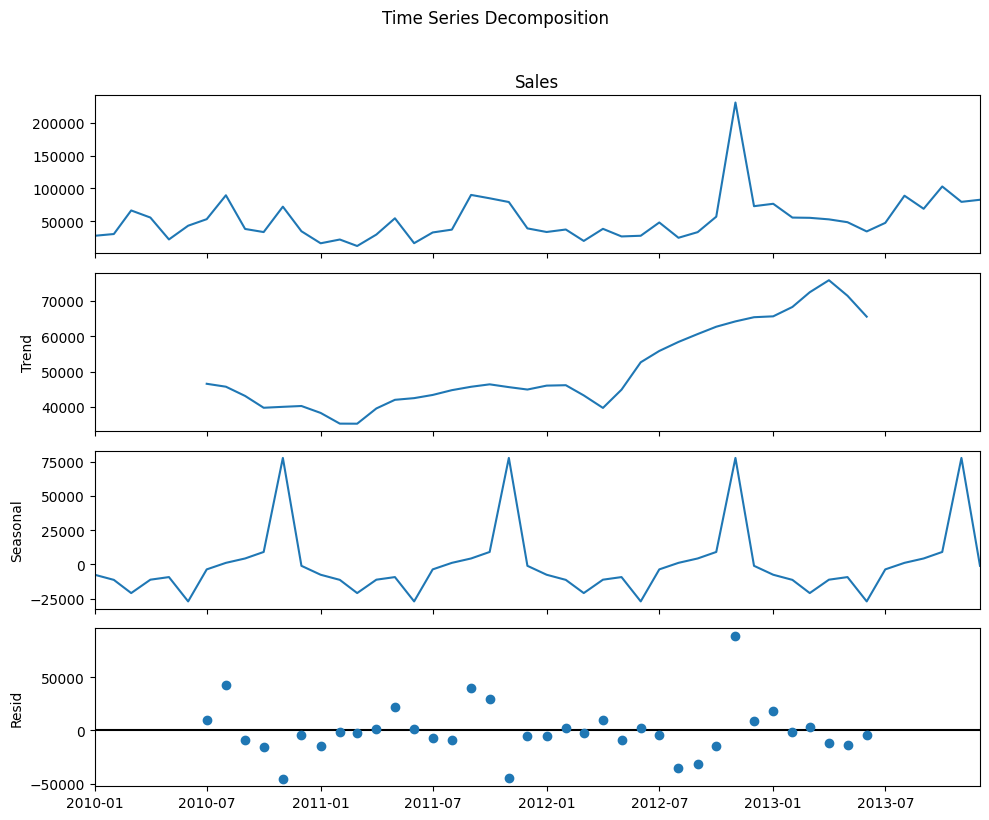

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(sales_ts,model='additive',period=12)
fig = decomposition.plot()
fig.set_size_inches(10, 8)
plt.suptitle('Time Series Decomposition', y=1.02)
plt.tight_layout()
plt.savefig('decomposition.png')

In [14]:
from statsmodels.tsa.stattools import adfuller
def run_adf_test(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    print(dfoutput)

run_adf_test(sales_ts)

Results of Dickey-Fuller Test:
Test Statistic                 -4.897154
p-value                         0.000035
#Lags Used                      0.000000
Number of Observations Used    47.000000
dtype: float64


In [15]:
from statsmodels.tsa.arima.model import ARIMA

model_arima = ARIMA(sales_ts, order=(0, 1, 1))

model_fit_arima = model_arima.fit()

print(model_fit_arima.summary())

forecast_arima = model_fit_arima.forecast(steps=12)

                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   48
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -559.704
Date:                Fri, 07 Nov 2025   AIC                           1123.408
Time:                        12:16:05   BIC                           1127.108
Sample:                    01-01-2010   HQIC                          1124.800
                         - 12-01-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8662      0.230     -3.774      0.000      -1.316      -0.416
sigma2      1.413e+09   1.14e-10   1.24e+19      0.000    1.41e+09    1.41e+09
Ljung-Box (L1) (Q):                   2.07   Jarque-

In [16]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model_sarima = SARIMAX(sales_ts,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 12))

model_fit_sarima = model_sarima.fit(disp=False)

print(model_fit_sarima.summary())

forecast_sarima = model_fit_sarima.forecast(steps=12)

/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -421.728
Date:                            Fri, 07 Nov 2025   AIC                            853.456
Time:                                    12:16:05   BIC                            861.232
Sample:                                01-01-2010   HQIC                           856.140
                                     - 12-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3490      0.416      0.838      0.402      -0.467       1.165
ma.L1         -0.9328      0.280   

--- 12-Month Sales Forecast by ARIMA ---
2014-01-01    70521.710166
2014-02-01    70521.710166
2014-03-01    70521.710166
2014-04-01    70521.710166
2014-05-01    70521.710166
2014-06-01    70521.710166
2014-07-01    70521.710166
2014-08-01    70521.710166
2014-09-01    70521.710166
2014-10-01    70521.710166
2014-11-01    70521.710166
2014-12-01    70521.710166
Freq: MS, Name: predicted_mean, dtype: float64


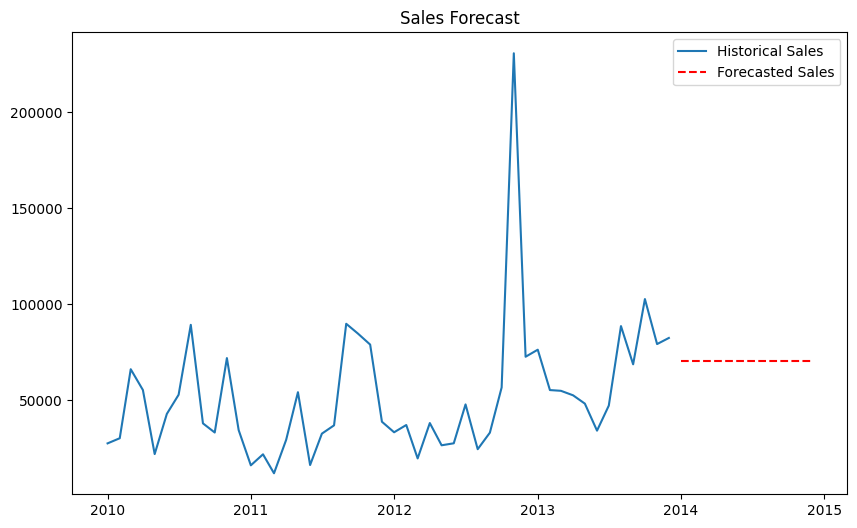

In [17]:
print("--- 12-Month Sales Forecast by ARIMA ---")
print(forecast_arima)


plt.figure(figsize=(10, 6))
plt.plot(sales_ts, label='Historical Sales')
plt.plot(forecast_arima, label='Forecasted Sales', color='red', linestyle='--')
plt.title('Sales Forecast')
plt.legend()
plt.show()

--- 12-Month Sales Forecast by SARIMA ---
2014-01-01     66211.419262
2014-02-01     63962.847258
2014-03-01     50123.115894
2014-04-01     64691.636359
2014-05-01     58640.573999
2014-06-01     52756.568192
2014-07-01     71146.326891
2014-08-01     60837.665731
2014-09-01     71313.948303
2014-10-01     90240.043116
2014-11-01    210590.630823
2014-12-01     92350.283330
Freq: MS, Name: predicted_mean, dtype: float64


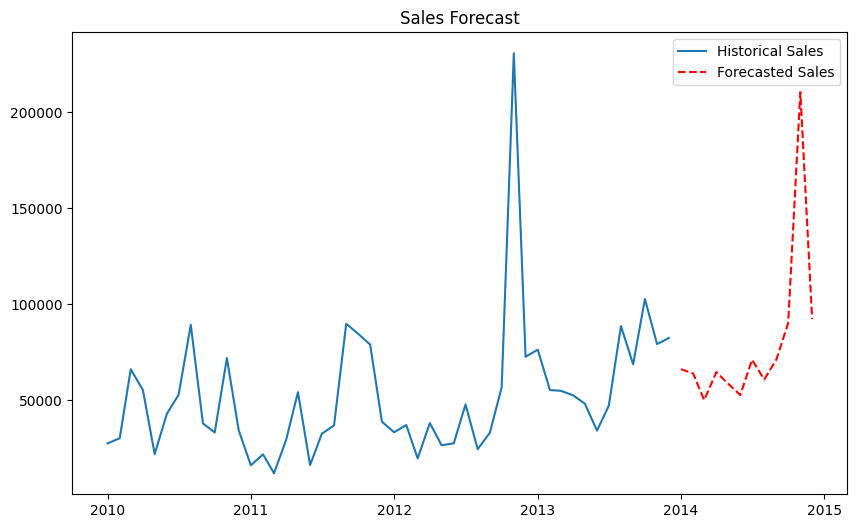

In [18]:
print("--- 12-Month Sales Forecast by SARIMA ---")
print(forecast_sarima)


plt.figure(figsize=(10, 6))
plt.plot(sales_ts, label='Historical Sales')
plt.plot(forecast_sarima, label='Forecasted Sales', color='red', linestyle='--')
plt.title('Sales Forecast')
plt.legend()
plt.show()

In [19]:
# !pip install pmdarima

In [20]:
import statsmodels.api as sm
import itertools
import warnings
sales_ts_log = np.log(sales_ts + 1)
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Testing {} non-seasonal combinations...'.format(len(pdq)))
print('Testing {} seasonal combinations...'.format(len(seasonal_pdq)))
print('Total models to test: {}'.format(len(pdq) * len(seasonal_pdq)))


best_aic = float("inf")
best_pdq = None
best_seasonal_pdq = None
best_model = None


Testing 8 non-seasonal combinations...
Testing 8 seasonal combinations...
Total models to test: 64


In [21]:
warnings.filterwarnings("ignore")

for param in pdq:

    for param_seasonal in seasonal_pdq:
        try:

            mod = sm.tsa.statespace.SARIMAX(sales_ts_log,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit(disp=False)

            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
                best_model = results

        except Exception as e:
            print(f"Error with {param}x{param_seasonal}: {e}")
            continue

print("\n--- Grid Search Complete ---")
print(f"Best AIC: {best_aic}")
print(f"Best non-seasonal order (p,d,q): {best_pdq}")
print(f"Best seasonal order (P,D,Q,m): {best_seasonal_pdq}")


--- Grid Search Complete ---
Best AIC: 35.440413491869634
Best non-seasonal order (p,d,q): (0, 1, 1)
Best seasonal order (P,D,Q,m): (0, 1, 1, 12)



--- Best Model Summary ---
                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(0, 1, 1)x(0, 1, 1, 12)   Log Likelihood                 -14.720
Date:                            Fri, 07 Nov 2025   AIC                             35.440
Time:                                    12:21:12   BIC                             38.574
Sample:                                01-01-2010   HQIC                            36.120
                                     - 12-01-2013                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4990      0.247     -2.016      0.044      -0.984      -0.014
ma.S.L1

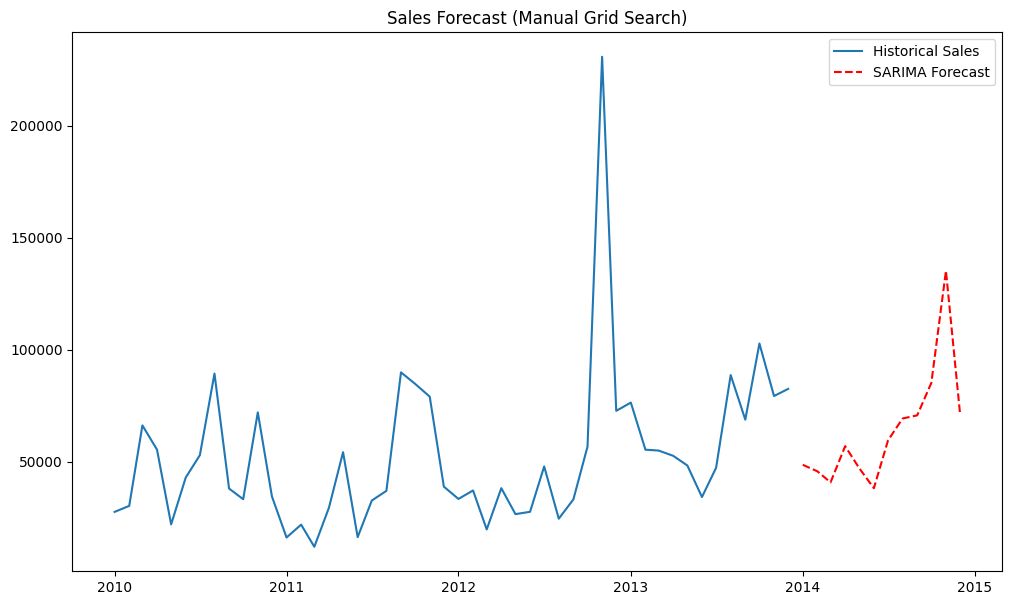

<Figure size 640x480 with 0 Axes>

In [23]:
print("\n--- Best Model Summary ---")

print(best_model.summary())

forecast_log = best_model.forecast(steps=12)

forecast = np.exp(forecast_log) - 1
forecast[forecast < 0] = 0

print("\n--- 12-Month Sales Forecast ---")
print(forecast)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 7))
plt.plot(sales_ts, label='Historical Sales')
plt.plot(forecast, label='SARIMA Forecast', color='red', linestyle='--')
plt.title('Sales Forecast (Manual Grid Search)')
plt.legend()
plt.show()
plt.savefig('sarima_forecasting_after_grid_search.png')